### Titanic data for Kaggle

In [1]:
!pwd

/c/Users/A547184/Git/Repos/python-cronicals/ML/Titanic-Kaggle


In [2]:
import pandas as pd
import numpy as np
import os

raw_data_path = os.path.join(os.path.curdir)
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')

train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Ibrahim Shawah, Mr. Yousseff",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
# dispersion measures
print('Min fare : {0}'.format(train_df.Fare.min())) # minimum
print('Max fare : {0}'.format(train_df.Fare.max())) # maximum
print('Fare range : {0}'.format(train_df.Fare.max()  - train_df.Fare.min())) # range
print('25 percentile : {0}'.format(train_df.Fare.quantile(.25))) # 25 percentile
print('50 percentile : {0}'.format(train_df.Fare.quantile(.5))) # 50 percentile
print('75 percentile : {0}'.format(train_df.Fare.quantile(.75))) # 75 percentile
print('Variance fare : {0}'.format(train_df.Fare.var())) # variance
print('Standard deviation fare : {0}'.format(train_df.Fare.std())) # standard deviation

Min fare : 0.0
Max fare : 512.3292
Fare range : 512.3292
25 percentile : 7.9104
50 percentile : 14.4542
75 percentile : 31.0
Variance fare : 2469.436845743116
Standard deviation fare : 49.6934285971809


## Univariate distribution

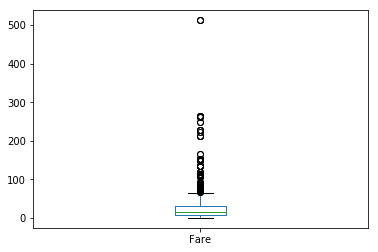

In [6]:
%matplotlib inline
train_df.Fare.plot(kind='box')

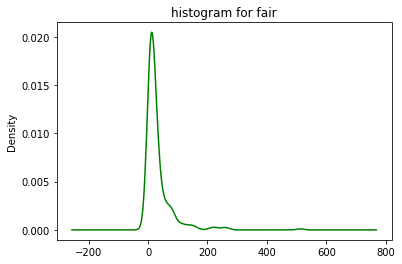

In [7]:
#train_df.Fare.plot(kind='hist', title='histogram for fair', color='g');
train_df.Fare.plot(kind='kde', title='histogram for fair', color='g');

## Bivariate distribution

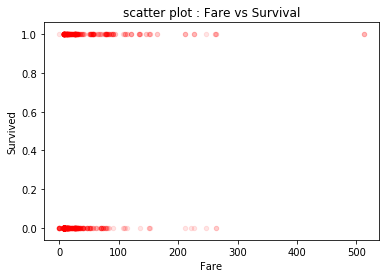

In [8]:
train_df.plot.scatter(x='Fare', y='Survived', color='r', title='scatter plot : Fare vs Survival', alpha= 0.1);

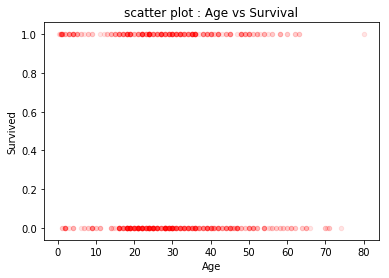

In [9]:
train_df.plot.scatter(x='Age', y='Survived', color='r', title='scatter plot : Age vs Survival', alpha= 0.1);

In [10]:
# train_df.loc[0:5, ['Sex', 'Survived']]
# train_df.loc[0:5, :]
mothers_df = train_df.loc[  (train_df['Sex'] == 'female') 
                          & (train_df['Parch'] > 0) 
                          & (train_df['Age'] > 18.00) , ['Sex', 'Age', 'Parch', 'Survived']]
print('Mothers : ', len(mothers_df))

Mothers :  64


In [11]:
train_df['isMother'] = np.where((train_df['Sex'] == 'female') & (train_df['Parch'] > 0) & (train_df['Age'] > 18.00), 1, 0)
train_df['isMother'].value_counts()

0    827
1     64
Name: isMother, dtype: int64

#### Cross-tab for categorical features ploting

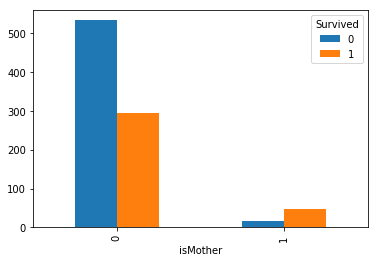

In [12]:
# train_df.plot.scatter(x='Parch', y='isMother', color='r', title='scatter plot : Chield vs Mother', alpha= 0.05);
pd.crosstab(train_df['isMother'], train_df['Survived']).plot(kind='bar');

In [13]:
pd.crosstab(train_df['isMother'], train_df['Survived'])

Survived,0,1
isMother,,
0,533,294
1,16,48


In [14]:
# train_df.groupby('isMother').Survived.value_counts()
# Show percentage
train_df.groupby('isMother').Survived.value_counts(normalize=True)

isMother  Survived
0         0           0.644498
          1           0.355502
1         1           0.750000
          0           0.250000
Name: Survived, dtype: float64

In [15]:
train_df.groupby('isMother')['Age'].mean()

isMother
0    29.215646
1    34.609375
Name: Age, dtype: float64

In [16]:
train_df.groupby('isMother').agg({'Age':'median','Fare':'mean' })

,Age,Fare
isMother,,
0,28.0,29.832960
1,33.5,62.845181


### Missing Values
##### Embarked column

In [17]:
# use .info() to detect missing values (if any)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
isMother    891 non-null int32
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 87.0+ KB


In [18]:
# extract rows with Embarked as Null
train_df[train_df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isMother
PassengerId,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [19]:
#pd.crosstab(train_df['Fare'], train_df['Embarked'])
train_df.groupby(['Pclass', 'Embarked'])['Fare'].median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [20]:
# replace the missing values with 'C'
train_df.Embarked.fillna('C', inplace=True)

##### Age column

In [21]:
# set maximum number of rows to be displayed
pd.options.display.max_rows = 15

In [22]:
train_df[train_df['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isMother
PassengerId,,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0
30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,0
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...
847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S,0


###### Try extrapolate age from names 
Find the mean/median age of each title(Mr/Miss/Officer). Then fill the ages with the median value of each group.

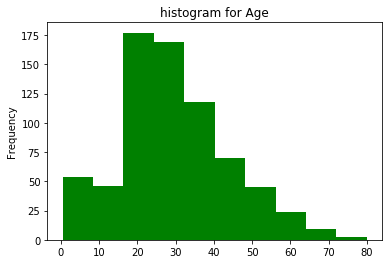

In [23]:
# Check age distribution
train_df.Age.plot(kind='hist', title='histogram for Age', bins = 10, color='g');

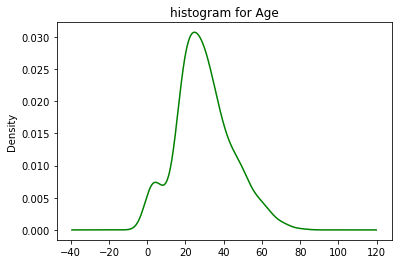

In [24]:
train_df.Age.plot(kind='kde', title='histogram for Age',  color='g');

In [25]:
# Function to extract the title from the name 
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [26]:
# use map function to apply the function on each Name value row i
train_df.Name.map(lambda x : GetTitle(x)) # alternatively you can use : df.Name.map(GetTitle)

PassengerId
1        mr
2       mrs
3      miss
4       mrs
5        mr
6        mr
7        mr
       ... 
885      mr
886     mrs
887     rev
888    miss
889    miss
890      mr
891      mr
Name: Name, Length: 891, dtype: object

In [27]:
train_df.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer'], dtype=object)

In [28]:
# Function to extract the title from the name 
def GetTitle(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [29]:
train_df.Name.map(lambda x : GetTitle(x))

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
6        Mr
7        Mr
       ... 
885      Mr
886     Mrs
887     Sir
888    Miss
889    Miss
890      Mr
891      Mr
Name: Name, Length: 891, dtype: object

In [30]:
train_df['Title'] = train_df.Name.map(lambda x : GetTitle(x))

In [31]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isMother,Title
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


In [32]:
train_df[train_df.Age.notnull()].groupby('Title')['Age'].median()

Title
Lady       40.5
Master      3.5
Miss       21.0
Mr         30.0
Mrs        35.0
Officer    50.0
Sir        42.0
Name: Age, dtype: float64

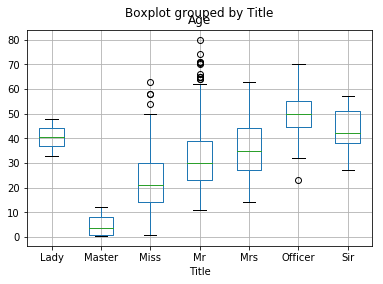

In [33]:
# Box plot of Age with title
train_df[train_df.Age.notnull()].boxplot('Age','Title');

In [34]:
# replace missing values
title_age_median = train_df.groupby('Title').Age.transform('median')
title_age_median

PassengerId
1      30.0
2      35.0
3      21.0
4      35.0
5      30.0
6      30.0
7      30.0
       ... 
885    30.0
886    35.0
887    42.0
888    21.0
889    21.0
890    30.0
891    30.0
Name: Age, Length: 891, dtype: float64

In [35]:
train_df.Age.fillna(title_age_median , inplace=True)
train_df[train_df.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isMother,Title
PassengerId,,,,,,,,,,,,,


In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
isMother    891 non-null int32
Title       891 non-null object
dtypes: float64(2), int32(1), int64(4), object(6)
memory usage: 94.0+ KB


### Investigation of Cabin

##### Cabin missing value treatment

In [37]:
train_df[train_df['Cabin'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isMother,Title
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr
6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q,0,Mr
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,Master
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,Mrs
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,0,Miss


In [38]:
train_df[train_df.Cabin.notnull()].Cabin.unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24

##### Explore the suspecious value

In [39]:
train_df[train_df.Cabin == 'T']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isMother,Title
PassengerId,,,,,,,,,,,,,
340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,0,Mr


##### Assign null to this cabin value
A single cabin class 'T' for a single passenger! Sounds erronous value.

In [40]:
train_df.loc[train_df.Cabin == 'T', 'Cabin'] = np.NaN

In [41]:
def getCabinClass(cabin):
    return cabin[0]

In [42]:
train_df['CabinClass'] = train_df[train_df.Cabin.notnull()].Cabin.map(getCabinClass)

In [43]:
train_df['CabinClass']

PassengerId
1      NaN
2        C
3      NaN
4        C
5      NaN
6      NaN
7        E
      ... 
885    NaN
886    NaN
887    NaN
888      B
889    NaN
890      C
891    NaN
Name: CabinClass, Length: 891, dtype: object

In [44]:
pd.crosstab(train_df[train_df.Cabin.notnull()]['CabinClass'], train_df[train_df.Cabin.notnull()]['Title'])

Title,Lady,Master,Miss,Mr,Mrs,Officer,Sir
CabinClass,,,,,,,
A,1,1,0,11,0,1,1
B,1,1,15,16,11,3,0
C,0,1,13,29,14,2,0
D,0,0,8,15,9,1,0
E,0,1,8,16,7,0,0
F,0,3,3,5,2,0,0
G,0,0,2,0,2,0,0


###### No relation

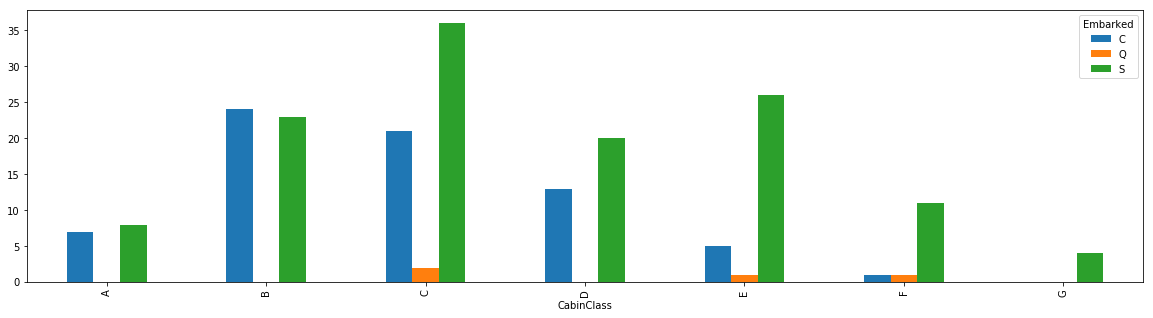

In [45]:
pd.crosstab(train_df['CabinClass'], train_df['Embarked']).plot(kind='bar', figsize=(20,5))

##### The is a relation between CabinClass <---> Title

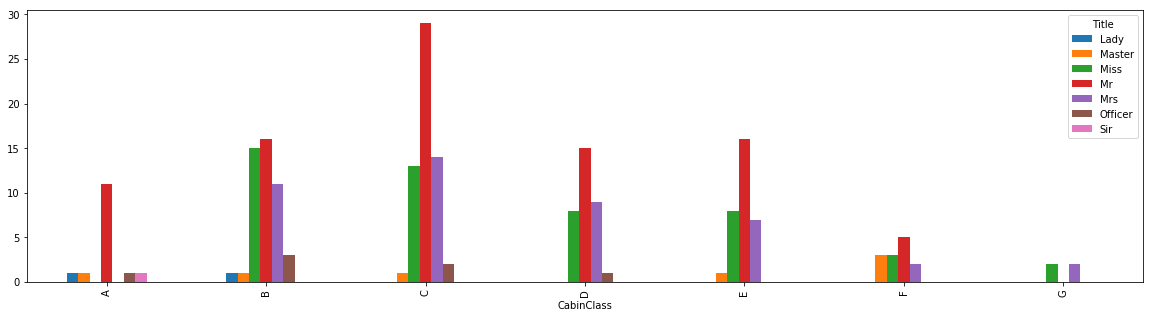

In [46]:
pd.crosstab(train_df[train_df.Cabin.notnull()]['CabinClass'], train_df[train_df.Cabin.notnull()]['Title']).plot(kind='bar', figsize=(20,5))

##### There is a relation between CabinClass <---> Pclass

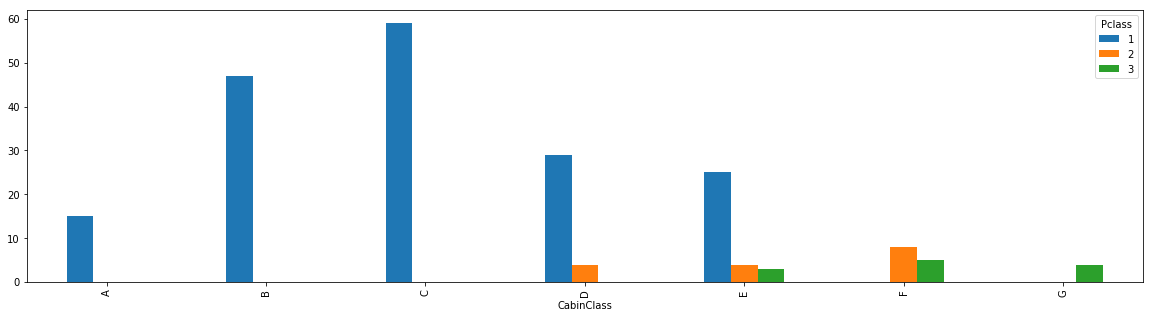

In [47]:
pd.crosstab(train_df[train_df.Cabin.notnull()]['CabinClass'], train_df[train_df.Cabin.notnull()]['Pclass']).plot(kind='bar', figsize=(20,5))

###### Investigating the Cabin has really a missing value
In the null CabinClass rows - there is a distribution of Title and Pclass available. So surely these are missing values.

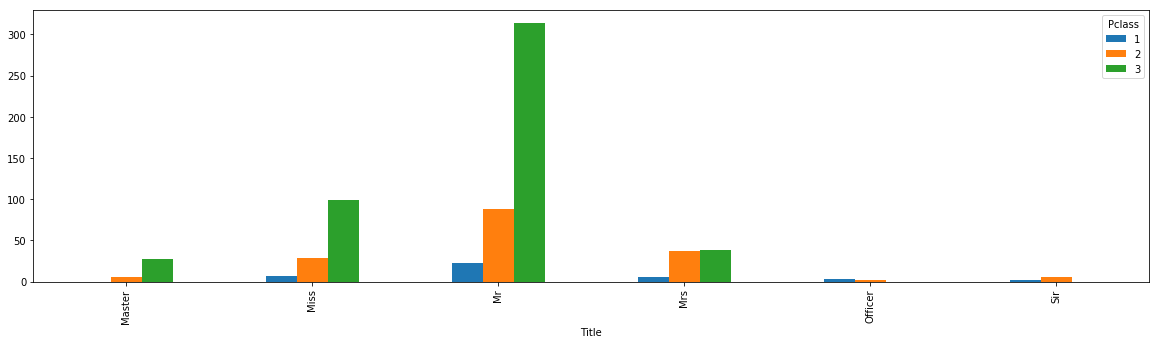

In [48]:
#train_df[train_df.Cabin.isnull()].CabinClass.plot(kind='bar', figsize=(20,5))
pd.crosstab(train_df[train_df.Cabin.isnull()].Title, train_df[train_df.Cabin.isnull()].Pclass).plot(kind='bar', figsize=(20,5))

Counts of Title in the missing values of Cabin

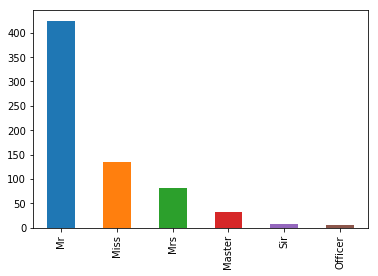

In [49]:
train_df[train_df.Cabin.isnull()].Title.value_counts().plot(kind='bar')

Counts of Title in the existing values of Cabin

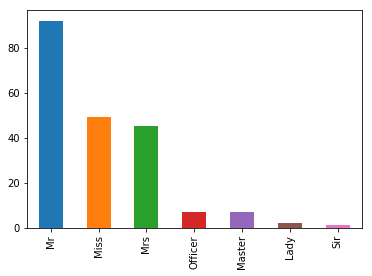

In [50]:
train_df[train_df.Cabin.notnull()].Title.value_counts().plot(kind='bar')

Counts of Pclass in the missing values of Cabin

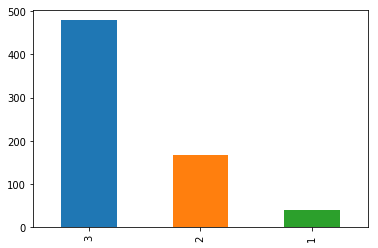

In [51]:
train_df[train_df.Cabin.isnull()].Pclass.value_counts().plot(kind='bar')

Counts of Pclass in the non-missing values of Cabin

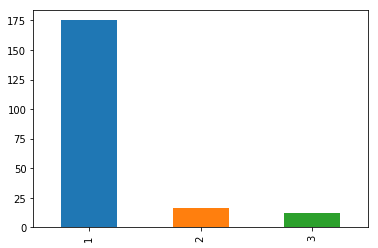

In [52]:
train_df[train_df.Cabin.notnull()].Pclass.value_counts().plot(kind='bar')

##### Fill up the missing Cabin with either Pclass distribution or Title distribution
We take Title because it has more class

In [53]:
train_df[train_df.Cabin.isnull()].Title.value_counts(normalize=True)

Mr         0.617733
Miss       0.196221
Mrs        0.119186
Master     0.047965
Sir        0.011628
Officer    0.007267
Name: Title, dtype: float64

Percentage of Pclass and Title in the missing values of Cabin

In [54]:
train_df[train_df.Cabin.isnull()].groupby(['Pclass' ]).Title.value_counts(normalize=True)

Pclass  Title  
1       Mr         0.560976
        Miss       0.170732
        Mrs        0.146341
        Officer    0.073171
        Sir        0.048780
2       Mr         0.523810
        Mrs        0.220238
        Miss       0.172619
        Master     0.035714
        Sir        0.035714
        Officer    0.011905
3       Mr         0.655532
        Miss       0.206681
        Mrs        0.081420
        Master     0.056367
Name: Title, dtype: float64

###### Convert the cabin class to integer value

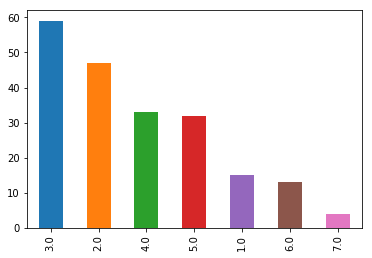

In [55]:
def getCabinClassInt(c):
    cabin_group = {'A' : 1, 
                   'B' : 2, 
                   'C' : 3, 
                   'D' : 4,
                   'E' : 5,
                   'F' : 6,
                   'G' : 7,
                   'T' : 8,               
                }
    
    return cabin_group[c]

train_df['CabinClassInt'] = train_df[train_df.Cabin.notnull()].CabinClass.map(getCabinClassInt)
train_df['CabinClassInt'].value_counts().plot(kind='bar')

##### Check the CabinClassInt has relation with fair

In [56]:
train_df.groupby('CabinClassInt')['Fare'].median()

CabinClassInt
1.0    35.50000
2.0    80.00000
3.0    83.47500
4.0    53.10000
5.0    45.18125
6.0    13.00000
7.0    13.58125
Name: Fare, dtype: float64

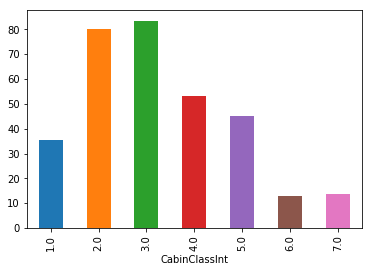

In [57]:
# pd.crosstab(train_df[train_df.CabinClassInt.notnull()]['CabinClassInt'],train_df[train_df.CabinClassInt.notnull()]['Fare'])
train_df.groupby('CabinClassInt')['Fare'].median().plot(kind='bar')

Check Non-empty cabin distribution among the Title/Pclass

In [58]:
train_df[train_df.Cabin.notnull()].pivot_table(index='Title',columns = 'Pclass',values='CabinClassInt', aggfunc='mean')

Pclass,1,2,3
Title,,,
Lady,1.500000,NaN,NaN
Master,2.000000,6.000000,5.000000
Miss,3.073171,5.400000,6.666667
Mr,3.059524,4.666667,5.800000
Mrs,3.162162,5.000000,6.333333
Officer,2.428571,NaN,NaN
Sir,1.000000,NaN,NaN


Check Non-empty cabin distribution among the Title/Pclass - Make a dictionary

In [59]:
AvgCabinFor_Title_Pclass = train_df[train_df.Cabin.notnull()].groupby(['Title', 'Pclass']).CabinClassInt.mean().to_dict()
AvgCabinFor_Title_Pclass

{('Lady', 1): 1.5,
 ('Master', 1): 2.0,
 ('Master', 2): 6.0,
 ('Master', 3): 5.0,
 ('Miss', 1): 3.073170731707317,
 ('Miss', 2): 5.4,
 ('Miss', 3): 6.666666666666667,
 ('Mr', 1): 3.0595238095238093,
 ('Mr', 2): 4.666666666666667,
 ('Mr', 3): 5.8,
 ('Mrs', 1): 3.1621621621621623,
 ('Mrs', 2): 5.0,
 ('Mrs', 3): 6.333333333333333,
 ('Officer', 1): 2.4285714285714284,
 ('Sir', 1): 1.0}

In [60]:
AvgCabinFor_Title_Pclass = train_df.groupby(['Title', 'Pclass']).CabinClassInt.mean().to_dict()
AvgCabinFor_Title_Pclass

{('Lady', 1): 1.5,
 ('Master', 1): 2.0,
 ('Master', 2): 6.0,
 ('Master', 3): 5.0,
 ('Miss', 1): 3.073170731707317,
 ('Miss', 2): 5.4,
 ('Miss', 3): 6.666666666666667,
 ('Mr', 1): 3.0595238095238093,
 ('Mr', 2): 4.666666666666667,
 ('Mr', 3): 5.8,
 ('Mrs', 1): 3.1621621621621623,
 ('Mrs', 2): 5.0,
 ('Mrs', 3): 6.333333333333333,
 ('Officer', 1): 2.4285714285714284,
 ('Officer', 2): nan,
 ('Sir', 1): 1.0,
 ('Sir', 2): nan}

###### Fill null with avg CabinClassInt of (Title and Pclass) group 

In [61]:
train_df['CabinClassInt'].fillna(train_df.groupby(['Title', 'Pclass']).CabinClassInt.transform('mean'), inplace=True)
# train_df['CabinClassInt'].fillna(train_df.groupby(['Pclass']).CabinClassInt.transform('mean'), inplace=True)

In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 15 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Ticket           891 non-null object
Fare             891 non-null float64
Cabin            203 non-null object
Embarked         891 non-null object
isMother         891 non-null int32
Title            891 non-null object
CabinClass       203 non-null object
CabinClassInt    883 non-null float64
dtypes: float64(3), int32(1), int64(4), object(7)
memory usage: 107.9+ KB


In [63]:
train_df['CabinClassInt'] = train_df['CabinClassInt'].apply(np.floor)

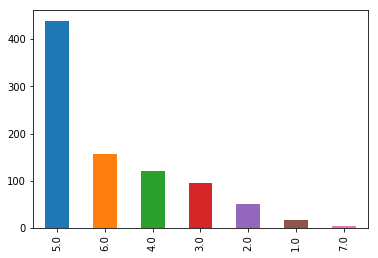

In [64]:
train_df['CabinClassInt'].value_counts().plot(kind='bar')

In [65]:
#train_df['PclassNTitle'] =  train_df.apply(lambda x: (x.Title, x.Pclass), axis=1)

###### Check the CabinClassInt distribution in Title

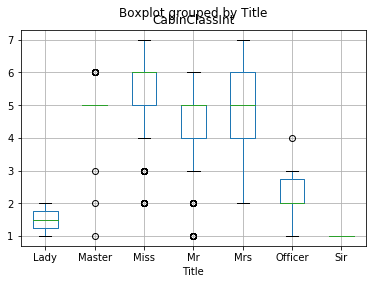

In [66]:
train_df.boxplot('CabinClassInt', 'Title')

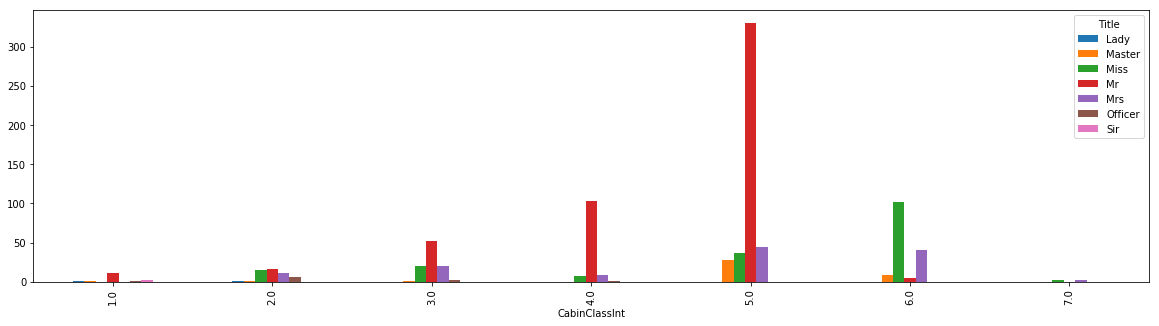

In [67]:
pd.crosstab(train_df['CabinClassInt'], train_df['Title']).plot(kind='bar', figsize=(20,5))

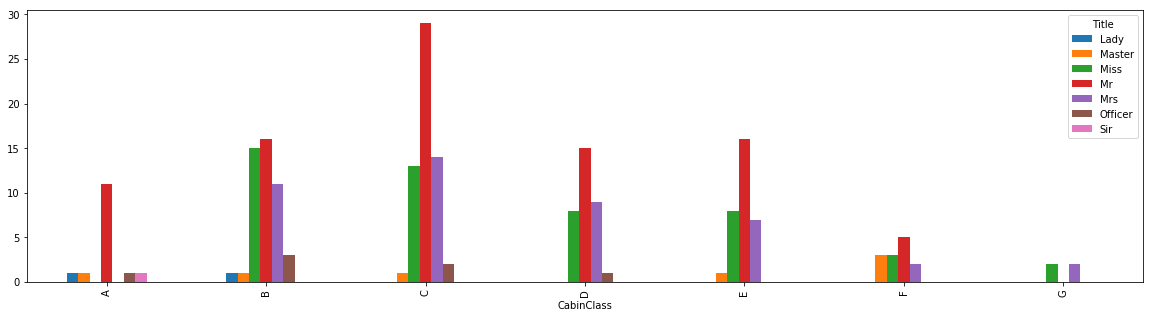

In [68]:
pd.crosstab(train_df['CabinClass'], train_df['Title']).plot(kind='bar', figsize=(20,5))

In [69]:
train_df['CabinClassInt'].fillna(train_df.groupby(['Pclass']).CabinClassInt.transform('median'), inplace=True)

In [70]:
train_df['CabinClassInt'] = train_df['CabinClassInt'].apply(np.floor)

In [ ]:
pd.crosstab(train_df['CabinClassInt'], train_df['Pclass']).plot(kind='bar', figsize=(20,5))

In [ ]:
pd.crosstab(train_df['CabinClass'], train_df['Pclass']).plot(kind='bar', figsize=(20,5))

In [ ]:
train_df.info()

### Outlier detection

##### Age

In [ ]:
train_df['Age'].plot(kind='hist', bins=10, color='c', figsize=(20,5))

###### Investigate the outlierages

In [ ]:
train_df.loc[train_df['Age']>70,:]

##### Fare

In [ ]:
# histogram for fare
train_df.Fare.plot(kind='hist', title='histogram for Fare', bins=20, color='c');

In [ ]:
# box plot to indentify outliers 
train_df.Fare.plot(kind='box');

###### Investigate the outlierages

In [ ]:
train_df.loc[train_df['Fare'] == train_df['Fare'].max(),:]

##### Transformations to reduce the skewness

In [ ]:
LogFare = np.log(train_df.Fare + 1.0) # Adding 1 to accomodate zero fares : log(0) is not defined
# Histogram of LogFare
LogFare.plot(kind='hist', color='c', bins=20);

##### Discretization / Binning

In [ ]:
train_df['Fare_Bin'] = pd.qcut(train_df['Fare'], 4, labels = ['very_low','low','high','very_high'])

In [ ]:
train_df['Fare_Bin'].value_counts().plot(kind='bar', color='c', rot=90)

### Feature Engineering

##### Feature Creation - Adult / Child

In [ ]:
train_df['AdultOrChild'] = np.where(train_df['Age'] > 18, 'Adult', 'Child')
train_df['AdultOrChild'].value_counts()

Survival change for the Child is high

In [ ]:
pd.crosstab(train_df['AdultOrChild'], train_df['Survived'], normalize='index')

##### Feature Creation - FamilySize

In [ ]:
# Family : Adding Parents with Siblings
train_df['FamilySize'] = train_df.Parch + train_df.SibSp + 1 # 1 for self

In [ ]:
# explore the family feature
train_df['FamilySize'].plot(kind='hist', color='c');

In [ ]:
# further explore this family with max family members
train_df.loc[train_df.FamilySize == train_df.FamilySize.max()]

In [ ]:
pd.crosstab( train_df.FamilySize, train_df.Survived).plot(kind='bar')

##### Feature : IsMother

Already implemented above